# Welcome to CVsim!

In [ ]:
# Uncomment and run below command if you're running the notebook locally and need to install cvsim.

#!pip install cvsim

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvsim.mechanisms import E_rev, E_q, E_qC, EE, SquareScheme
from cvsim.fit_curve import FitE_rev, FitE_q, FitE_qC, FitEE, FitSquareScheme

## Example: Reversible, one-electron mechanism

Text(0, 0.5, 'Current (mA)')

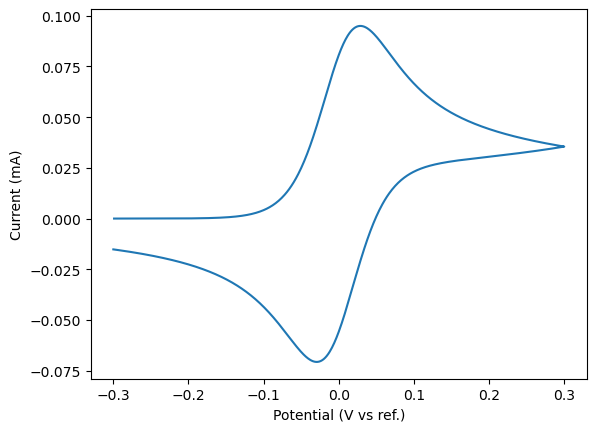

In [2]:
potential, current = E_rev(
    start_potential=-0.3,     # V vs ref.
    switch_potential=0.3,     # V vs ref.
    reduction_potential=0.0,  # V vs ref.
    scan_rate=0.1,            # V/s
    c_bulk=5,                 # mM
    diffusion_reactant=1e-5,  # cm2/s
    diffusion_product=1e-5,   # cm2/s
).simulate()

fig, ax = plt.subplots()
ax.plot(potential, current*1000)
ax.set_xlabel('Potential (V vs ref.)')
ax.set_ylabel('Current (mA)')

## Example: Quasi-reversible, one-electron mechanism

Text(0, 0.5, 'Current (mA)')

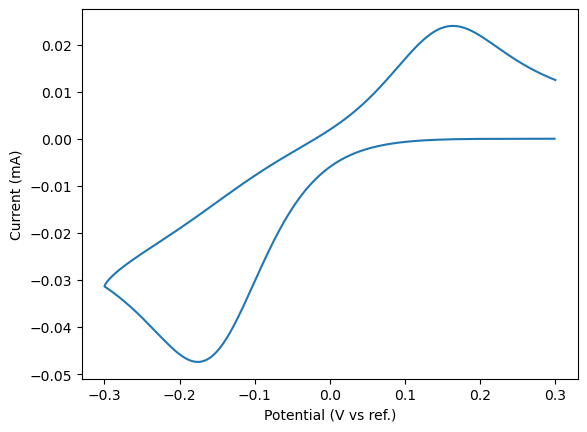

In [3]:
potential, current = E_q(
    start_potential=0.3,      # V vs ref.
    switch_potential=-0.3,    # V vs ref.
    reduction_potential=0.0,  # V vs ref.
    scan_rate=1,              # V/s
    c_bulk=1,                 # mM
    diffusion_reactant=1e-5,  # cm2/s
    diffusion_product=1e-5,   # cm2/s
    alpha=0.5,                # unitless
    k0=1e-3,                  # cm/s
).simulate()

fig,ax = plt.subplots()
ax.plot(potential, current*1000)
ax.set_xlabel('Potential (V vs ref.)')
ax.set_ylabel('Current (mA)')

## Example: The EC mechanism

Text(0, 0.5, 'Current (mA)')

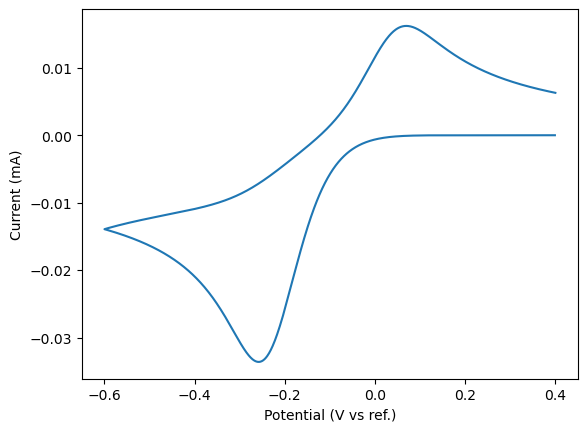

In [4]:
potential, current = E_qC(
    start_potential=0.4,       # V vs ref.
    switch_potential=-0.6,     # V vs ref.
    reduction_potential=-0.1,  # V vs ref.
    scan_rate=0.5,             # V/s
    c_bulk=1,                  # mM
    diffusion_reactant=1e-5,   # cm2/s
    diffusion_product=1e-5,    # cm2/s
    alpha=0.5,                 # unitless
    k0=1e-3,                   # cm/s
    k_forward=0.01,            # 1/s
    k_backward=0.015,          # 1/s
).simulate()

fig,ax = plt.subplots()
ax.plot(potential, current*1000)
ax.set_xlabel('Potential (V vs ref.)')
ax.set_ylabel('Current (mA)')

## Example: The EE mechanism

Text(0, 0.5, 'Current (mA)')

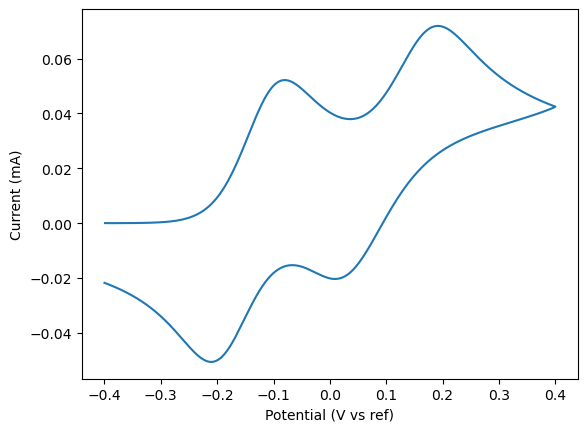

In [5]:
potential, current = EE(
    start_potential=-0.4,         # V vs ref.
    switch_potential=0.4,         # V vs ref.
    reduction_potential=-0.15,    # V vs ref.
    reduction_potential2=0.1,     # V vs ref.
    scan_rate=1.0,                # V/s
    c_bulk=1,                     # mM
    diffusion_reactant=1e-5,      # cm2/s
    diffusion_intermediate=1e-5,  # cm2/s
    diffusion_product=1e-5,       # cm2/s
    alpha=0.5,                    # unitless
    alpha2=0.5,                   # unitless
    k0=1e-2,                      # cm/s
    k0_2=5e-3,                    # cm/s
).simulate()

fig,ax = plt.subplots()
ax.plot(potential, current*1000)
ax.set_xlabel('Potential (V vs ref.)')
ax.set_ylabel('Current (mA)')

## Example: The Square Scheme mechanism

Text(0, 0.5, 'Current (mA)')

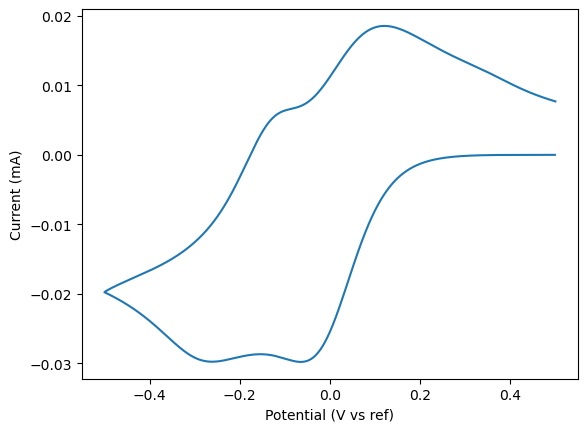

In [6]:
potential, current = SquareScheme(
    start_potential=0.5,        # V vs ref.
    switch_potential=-0.5,      # V vs ref.
    reduction_potential=0.2,    # V vs ref.
    reduction_potential2=-0.2,  # V vs ref.
    scan_rate=1.0,              # V/s
    c_bulk=1,                   # mM
    diffusion_reactant=1e-5,    # cm2/s
    diffusion_product=1e-5,     # cm2/s
    alpha=0.5,                  # unitless
    alpha2=0.5,                 # unitless
    k0=1e-3,                    # cm/s
    k0_2=5e-3,                  # cm/s
    k_forward=0.3,              # 1/s
    k_backward=0.1,             # 1/s
    k_forward2=0.01,            # 1/s
    k_backward2=0.002,          # 1/s
).simulate()

fig,ax = plt.subplots()
ax.plot(potential, current*1000)
ax.set_xlabel('Potential (V vs ref.)')
ax.set_ylabel('Current (mA)')

# Fitting CVs

## Example: fit the E_rev mechanism

final fitting vars: {'reduction_potential': [-0.082, -0.5, 0.3], 'diffusion_reactant': [1e-06, 5e-08, 0.0001], 'diffusion_product': [1e-06, 5e-08, 0.0001]}
Initial guesses: (-0.082, 1e-06, 1e-06)
Lower/Upper bounds: (-0.5, 5e-08, 5e-08)/(0.3, 0.0001, 0.0001)
Fixed params: []
Fitting for: ['reduction_potential', 'diffusion_reactant', 'diffusion_product']
trying values: (-0.082, 1e-06, 1e-06)
trying values: (-0.0820000149011612, 1e-06, 1e-06)
trying values: (-0.082, 1.0149011611938476e-06, 1e-06)
trying values: (-0.082, 1e-06, 1.0149011611938476e-06)
trying values: (-0.082, 1e-06, 1e-06)
Final fit: 'reduction_potential': -8.20E-02 +/- 2E-03
Final fit: 'diffusion_reactant': 1.00E-06 +/- 1E-10
Final fit: 'diffusion_product': 1.00E-06 +/- 2E-07


Text(0, 0.5, 'Current (mA)')

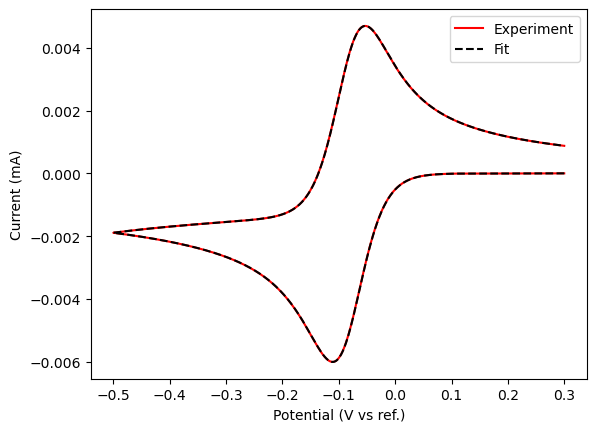

In [7]:
# if you don't have real CV data to fit, make "fake" data here via CVsim
fake_voltages, fake_currents = E_rev(0.3, -0.5, -0.1, 0.1, 1, 1e-6, 4e-6).simulate()
# add data point at zero current
fake_voltages = np.insert(fake_voltages, 0, 0.3)
fake_currents = np.insert(fake_currents, 0, 0.0)

# fit the "experiment"
fitted_voltage, fitted_current, final_fit = FitE_rev(
    voltage_to_fit=fake_voltages,  # list, V vs ref.
    current_to_fit=fake_currents,  # list, A
    scan_rate=0.1,                 # V/s
    c_bulk=1,                      # mM
    step_size=1,                   # mV
    disk_radius=1.5,               # mm
    temperature=298,               # K
).fit()

fig, ax = plt.subplots()
ax.plot(fake_voltages, fake_currents*1000, 'r', label="Experiment")
ax.plot(fitted_voltage, fitted_current*1000, 'k--', label="Fit")
ax.legend()
ax.set_xlabel('Potential (V vs ref.)')
ax.set_ylabel('Current (mA)')

In [8]:
# access final fit parameters
final_fit

{'reduction_potential': -0.082,
 'diffusion_reactant': 1e-06,
 'diffusion_product': 1e-06}